## Imports and other definitions

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import holoviews as hv
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append('..')
from src.image_utils import *
from src.spectral_variables import *

hv.notebook_extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [4]:
def snv(cube, bands_to_include):
    snv_vals = cube[bands_to_include].copy()
    means = snv_vals.values.mean(axis=0)
    stds = snv_vals.values.std(axis=0)
    snv_vals= (snv_vals.values - means) / stds
    return snv_vals

# Raw data and preprocessing

Raw data contains the following:

* VNIR tiles with 0.5m spatial resolution and 186 spectral bands with around 3.5nm bandwidth. Each tile has spatial extent of 500x500m (1000x1000px).
* SWIR tiles with 1m spatial resolution and 288 spectral bands with around 6nm bandwidth. Each tile has spatial extent of 500x500m (500x500px)
* LiDAR data with average of 13.2 pulses per m².
* Canopy Height Model (CHM) derived from .las files

LiDAR data is not used in this analysis after CHM.

VNIR and SWIR sensors have some overlap, and if all bands are used, then perhaps only either VNIR bands 173-186 or SWIR bands 1-9 should be selected.

Hyperspectral data is atmospheric corrected by provider. After this process, SWIR channels after 274 are masked due to noise, and the following bands are interpolated due to water or oxygen absorption:
* 720 nm
* 895-1000 nm
* 1081-1191 nm
* 1332-1469 nm
* 1780-2021 nm

This means that even though there is some overlap between sensors, all of it happens in interpolated area and thus we don't need to worry about that, assuming we discard interpolated bands.

Preprocessing steps done before segmentation is very light, as it only contains the following steps:
1. Match VNIR and SWIR tile IDs
2. Extract tile area from full area CHM
3. Discard masked SWIR bands
4. Clip all values to be between 0 and 100, and then divide all by 100 in order to have reflectance values between 0 and 1
5. Upsample SWIR to 0.5m spatial resolution with nearest neighbor interpolation
6. Stack tiles and save them as .tif

Final tiles have 461 bands, with bands 1-186 being VNIR, 187-460 SWIR and 461 CHM. Note that these still contain interpolated bands.

In [20]:
datapath = Path('../data/tiles/')
tile = 'R14C15'
cube = xr.open_rasterio(datapath/(tile+'.tif'))
cube.coords['wavelength'] = ('band', list(atm_cor_bandwidths) + ['CHM'])
cube = cube.swap_dims({'band': 'wavelength'})
cube

<xarray.DataArray (wavelength: 461, y: 1000, x: 1000)>
[461000000 values with dtype=float32]
Coordinates:
    band        (wavelength) int64 1 2 3 4 5 6 7 ... 455 456 457 458 459 460 461
  * y           (y) float64 6.789e+06 6.789e+06 ... 6.788e+06 6.788e+06
  * x           (x) float64 3.998e+05 3.998e+05 ... 4.003e+05 4.003e+05
  * wavelength  (wavelength) <U32 '401.32798' '404.51794' ... '2449.4382' 'CHM'
Attributes:
    transform:   (0.5, 0.0, 399758.5, 0.0, -0.5, 6788732.5)
    res:         (0.5, 0.5)
    is_tiled:    0
    nodatavals:  (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

We use Xarray as our data format. It is able to read geotiff-files with `open_rasterio` method, though saving new geotiff files is rather difficult.

With holoviews we can interactively change and visualize each channel, at least while running the notebook.

:DynamicMap   [wavelength]
   :Image   [x,y]   (Value)
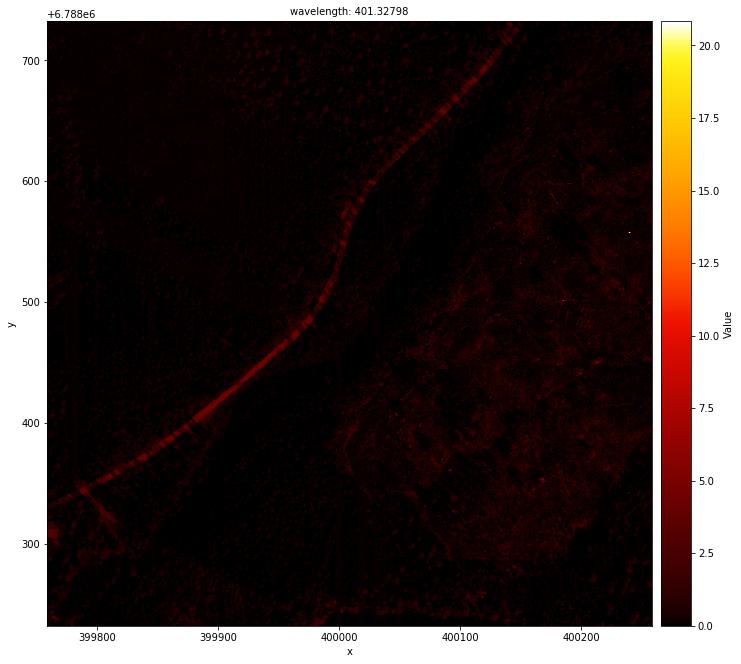

In [21]:
%%opts Image [fontsize={{'title':10, 'xlabel':10, 'ylabel':10, 'ticks':10}}, fig_size=300] 
#width=700, height=600] these are for bokeh-backend

ds = hv.Dataset(cube, vdims=['Value'])
ds.to(hv.Image, kdims=['x', 'y'], dynamic=True).options(colorbar=True)

Average spectra for this tile, interpolated bands highlighted.

As mentioned before, there is a slight overlap in VNIR and SWIR.

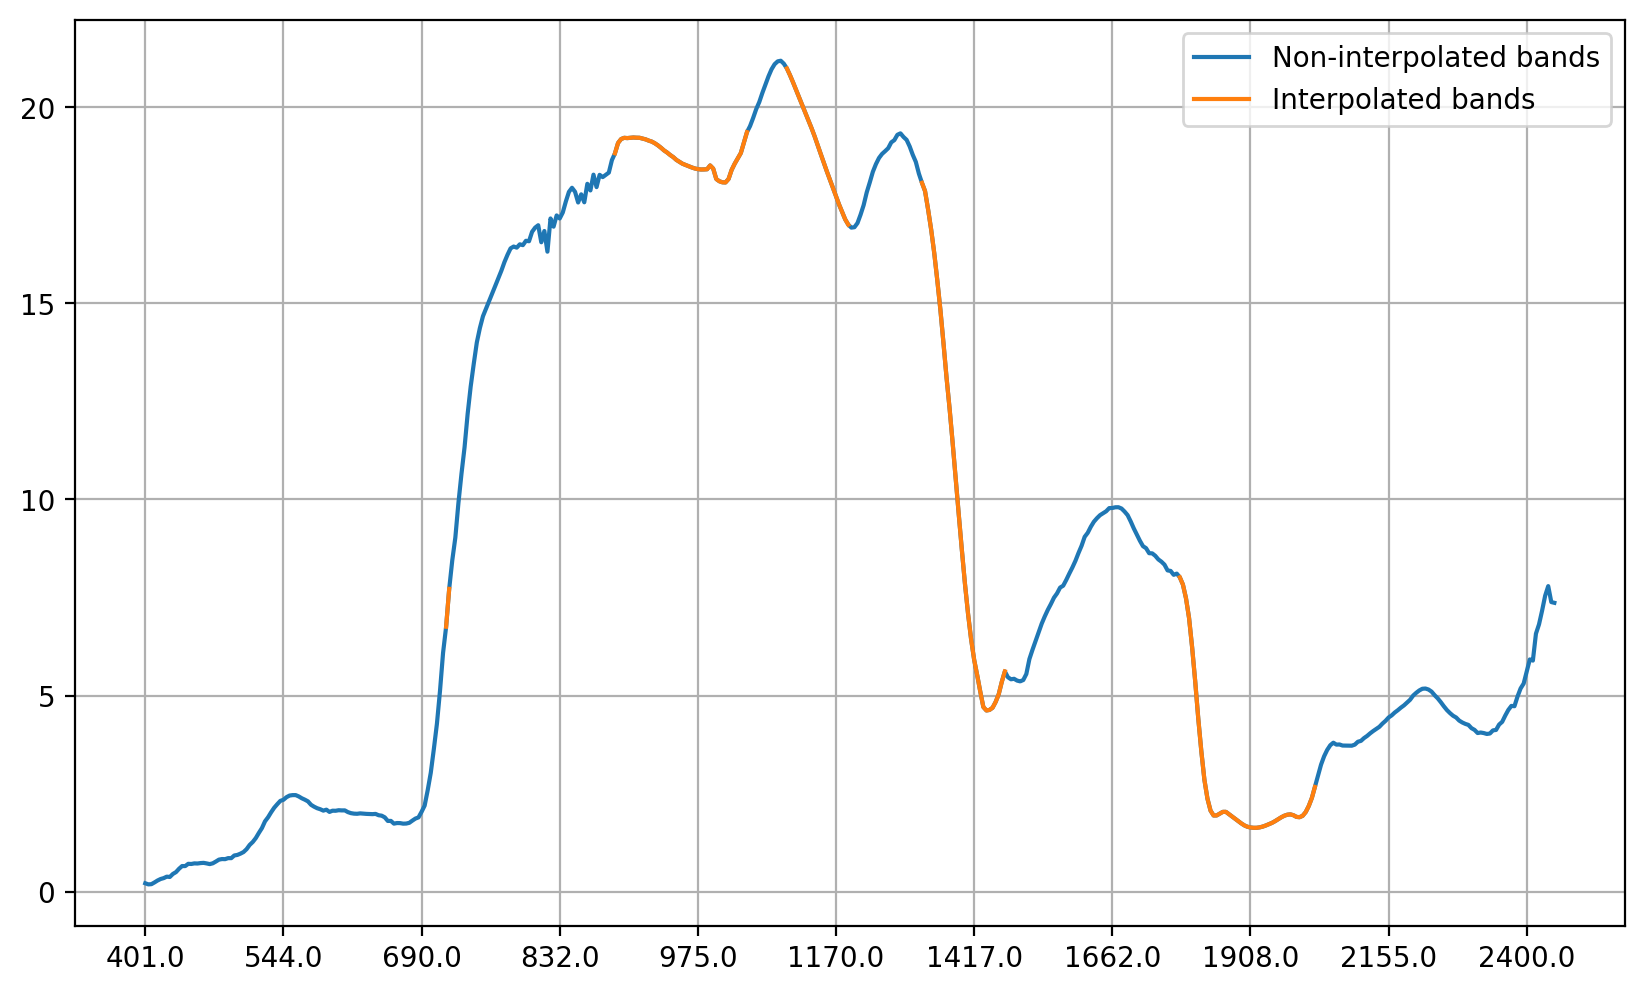

In [22]:
plt.figure(figsize=(10,6), dpi=200)
cubemeans = cube[:-1].values.mean(axis=(1,2))
interp_bands = [None for i in range(len(cubemeans))]
interp_bands[98:100] = cubemeans[98:100]
interp_bands[153:197] = cubemeans[153:197]
interp_bands[209:230] = cubemeans[209:230]
interp_bands[253:281] = cubemeans[253:281]
interp_bands[337:382] = cubemeans[337:382]
plt.plot(cubemeans)
plt.plot(interp_bands)
labels = [round(atm_cor_bandwidths[i],0) for i in np.arange(0, len(atm_cor_bandwidths)-1, step=45)]

plt.xticks(np.arange(len(atm_cor_bandwidths), step=45), labels)
plt.grid()
plt.legend(['Non-interpolated bands', 'Interpolated bands'])
plt.show()

Do some magic calculations and show images.

In [23]:
b = 28
g = 49
r = 82
min_q = 0.1
max_q = 99.9
vmin, vmax = calc_quantiles(cube.values, channels=(r,g,b), min_q=min_q, max_q=max_q)


In [24]:
rgb_scaled = scale_image(cube.values, channels=(r,g,b), vmin=vmin, vmax=vmax)

First RGB

:RGB   [x,y]   (R,G,B)
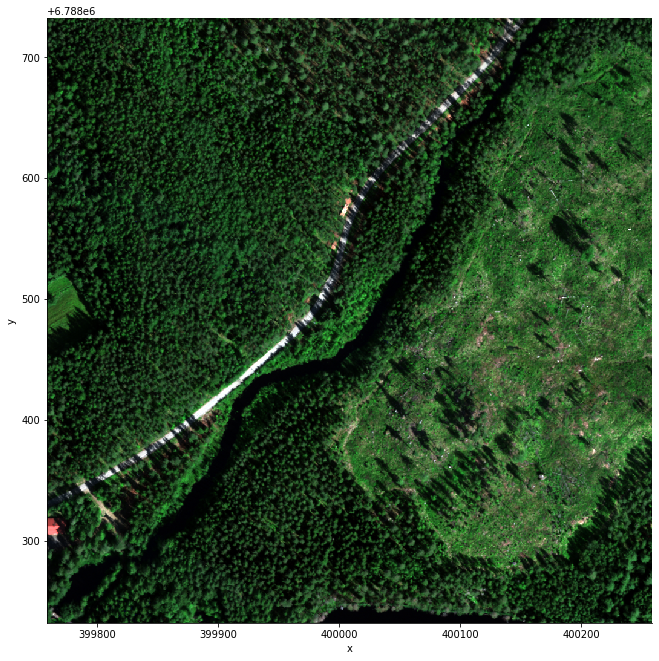

In [25]:
%%opts RGB [fontsize={{'title':15, 'xlabel':10, 'ylabel':10, 'ticks':10}}, fig_size=300]

hv.RGB((cube['x'], cube['y'], 
        rgb_scaled[...,0], 
        rgb_scaled[...,1], 
        rgb_scaled[...,2]) , vdims=list('RGB')
       ) 

And then NIR-red-green false color image

:RGB   [x,y]   (R,G,B)
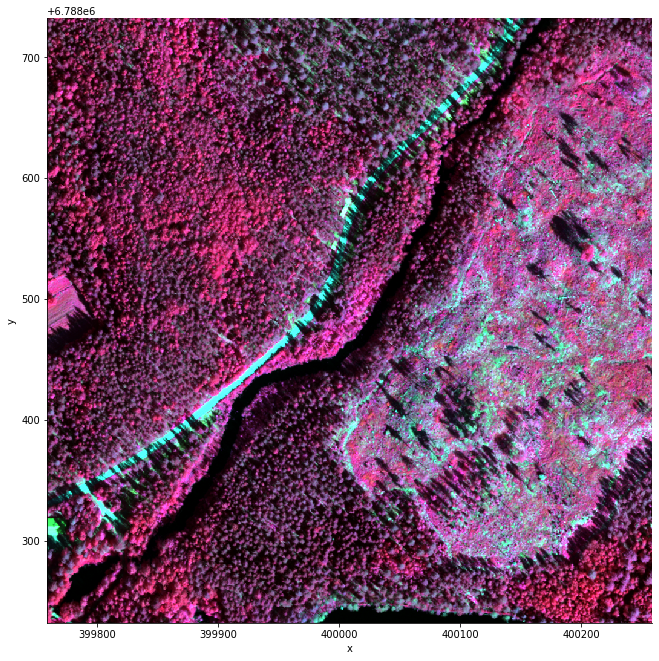

In [26]:
%%opts RGB [fontsize={{'title':15, 'xlabel':10, 'ylabel':10, 'ticks':10}}, fig_size=300]
false_color_scaled = scale_image(cube.values, channels=(145,82,49))
hv.RGB((cube['x'], cube['y'],
        false_color_scaled[...,0], 
        false_color_scaled[...,1], 
        false_color_scaled[...,2]
        ) , vdims=list('RGB')
       ) 

And then canopy height model:

:Image   [x,y]   (Value)
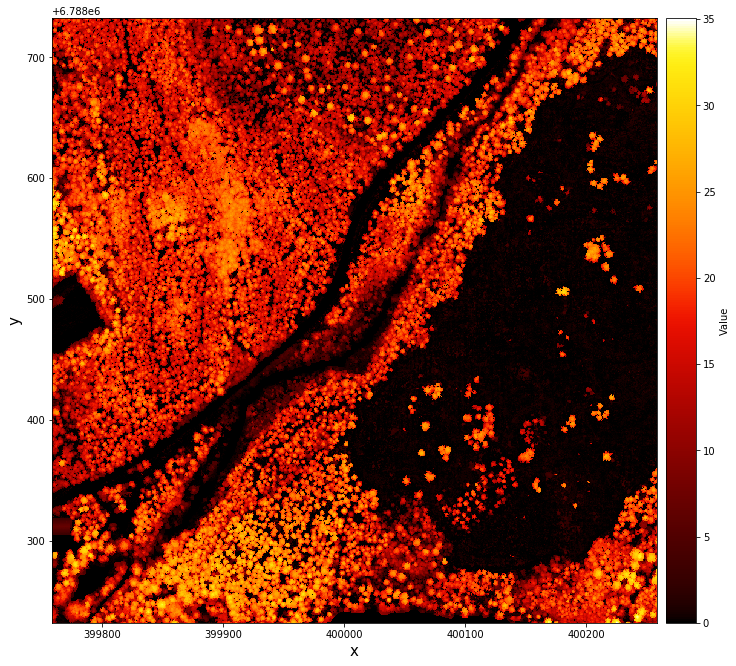

In [33]:
%%opts Image [fontsize={{'title':15, 'xlabel':15, 'ylabel':15, 'ticks':10}}, fig_size=300]

ds = hv.Dataset(cube[-1], vdims=['Value'])
ds.to(hv.Image, kdims=['x', 'y']).options(colorbar=True)